In [51]:
import numpy as np
import pandas as pd
import json
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
########
##TODO
########
# Analyse the language of the song. Most people only listen to songs in their language or in english
# Parse the release_date
# Investigate the different context_type, platform_name and platform_family
# Create a user-song matrix and use an EM algorithm to infer ratings and features for each song
# Create a feature giving the period of the day (morning, lunch time, afternoon etc.)
# Find the artist/song popularity

In [41]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


In [28]:
# Import the extra infos about each song
extra_infos = []
with open('extra_infos.json') as json_file:
    for line in json_file:
        extra_infos.append(json.loads(line))

In [44]:
def convert_ts(ts):
    formatted_date = datetime.datetime.fromtimestamp(
        ts).strftime('%Y-%m-%d %H:%M:%S')
    return(formatted_date)

train['ts_listen_fmt'] = train['ts_listen'].map(convert_ts)

In [75]:
# Parse year/month/day/hour
train['year_listen'] = pd.DatetimeIndex(train['ts_listen_fmt']).year
train['month_listen'] = pd.DatetimeIndex(train['ts_listen_fmt']).month
train['day_listen'] = pd.DatetimeIndex(train['ts_listen_fmt']).day
train['hour_listen'] = pd.DatetimeIndex(train['ts_listen_fmt']).hour

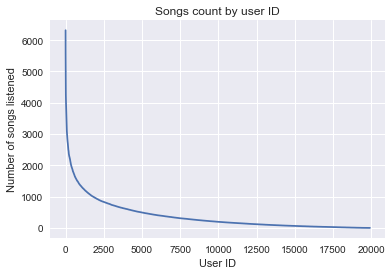

In [87]:
plt.plot(train.groupby('user_id')['is_listened'].count())
plt.xlabel('User ID')
plt.ylabel('Number of songs listened')
plt.title('Songs count by user ID')
plt.show()

The user ID seems to be linked with the date at which the user joined Deezer. 

In [94]:
print('Songs are listened {0:.0f}% of the time on average.'.format(100*train['is_listened'].mean()))

Songs are listened 68% of the time on average.


In [98]:
print('First songs are listened {0:.0f}% of the time on average (Flow).'\
      .format(100*(train['is_listened'] * train['listen_type']).mean()))

First songs are listened 18% of the time on average (Flow).
